# Project Title:  
**Breast Cancer Diagnosis Prediction using Exploratory Data Analysis, Statistical Testing, and Machine Learning**

---

## Objective:
The objective of this project is to analyze the Breast Cancer Wisconsin (Diagnostic) dataset to understand the key differences between benign and malignant tumors through both **data visualization** and **statistical testing**. Furthermore, machine learning models are applied to predict tumor diagnosis (Benign vs. Malignant) based on cell features.

---

## Why this project?
Breast cancer is one of the most common cancers among women worldwide. Early and accurate detection can significantly improve survival rates. This project aims to replicate a mini-version of the analytical approaches used in real biomedical research and clinical decision support systems, by Exploratory Data Analysis (EDA), performing hypothesis-driven statistical testing, and building predictive models, .

---

## Project Workflow:
1. **Data Loading and Cleaning**  
   - Import dataset, check missing values, and ensure data quality.

2. **Exploratory Data Analysis (EDA)**  
   - Visualize the distribution of tumor diagnosis.  
   - Compare important features (e.g., radius, perimeter, concavity) between benign and malignant cases.  
   - Generate correlation heatmaps to identify the most relevant predictors.

3. **Statistical Testing**  
   - Apply hypothesis testing (e.g., t-tests) to evaluate whether the differences in certain features (like radius_mean, concavity_mean, etc.) between benign and malignant groups are statistically significant.  
   - This highlights which features have the strongest evidence to distinguish tumor types beyond visual trends.

4. **Machine Learning (ML) Modeling**  
   - Train classification models (Logistic Regression, Random Forest, etc.).  
   - Evaluate model performance using accuracy, precision, recall, and ROC-AUC.  
   - Identify which features contribute most to the model’s predictive power.

5. **Conclusion & Insights**  
   - Summarize findings from both EDA and statistical testing.  
   - Discuss how ML can aid in breast cancer diagnosis.  
   - Highlight limitations and potential next steps.


---

## Tools and Libraries:
- **Python** (pandas, numpy, matplotlib, seaborn, scipy, scikit-learn)  
- **Environment**: Jupyter Notebook (VS Code extension)

---


In [63]:
import pandas as pd #Essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file = "data.csv" #Loading Dataset & Exploring the dataframe
df = pd.read_csv(file)
print(df.shape) 
print(df.columns) 
df.head()

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [65]:
df = df.drop(columns=['id', 'Unnamed: 32']) #Dropping unecessary features.
print(df.shape)   
print(df['diagnosis'].value_counts()) 
df.head() 

(569, 31)
diagnosis
B    357
M    212
Name: count, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
print("Missing values in each column:") #checking if there are any missing values.
print(df.isnull().sum())
df.describe()

Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\User\AppData\Local\Temp\ipykernel_2200\4146219756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


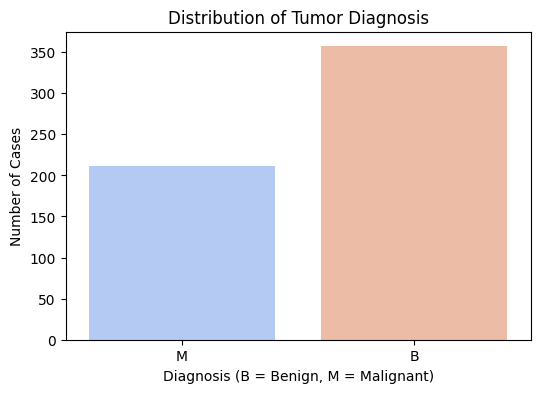

In [67]:
plt.figure(figsize=(6,4)) #Plotting a Graph that shows number of cases vs  diagnosis(malignant and benign).
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title("Distribution of Tumor Diagnosis")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Number of Cases")
plt.show()

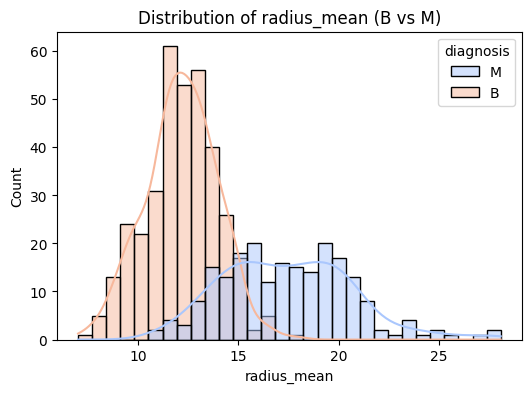

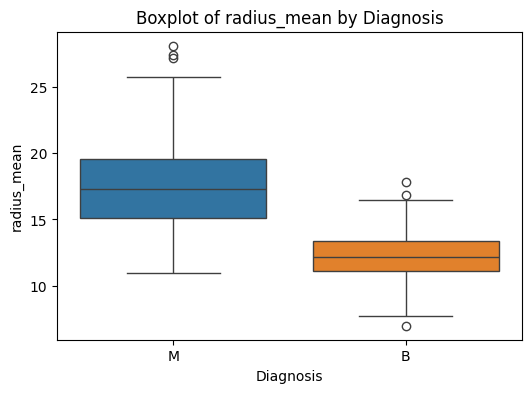

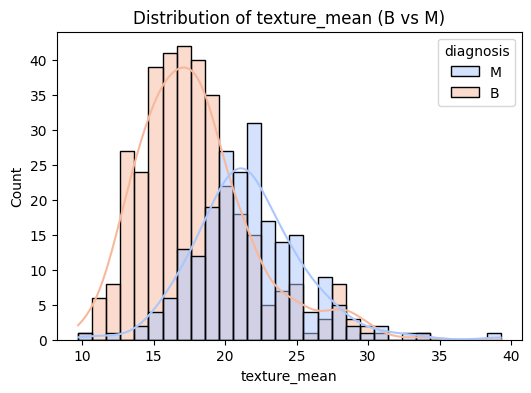

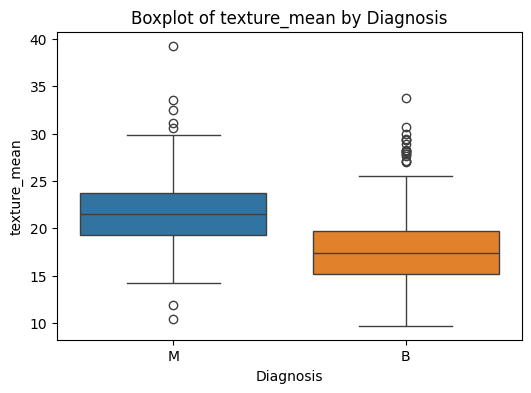

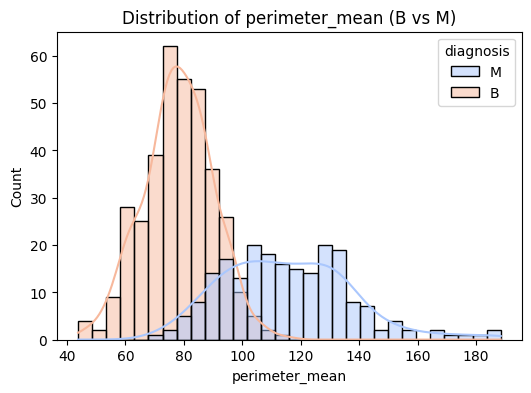

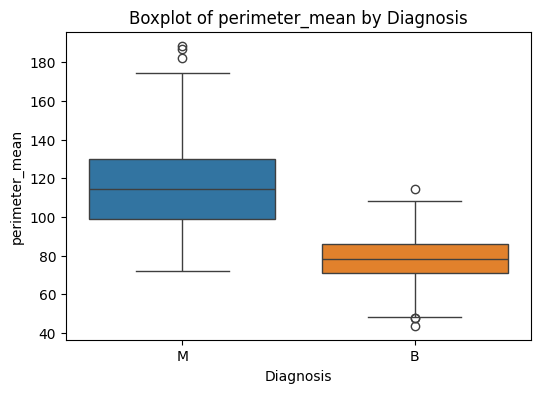

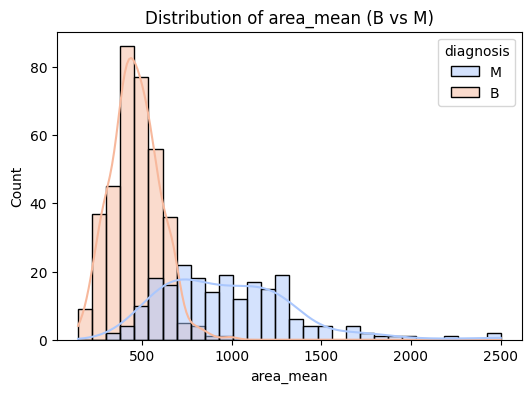

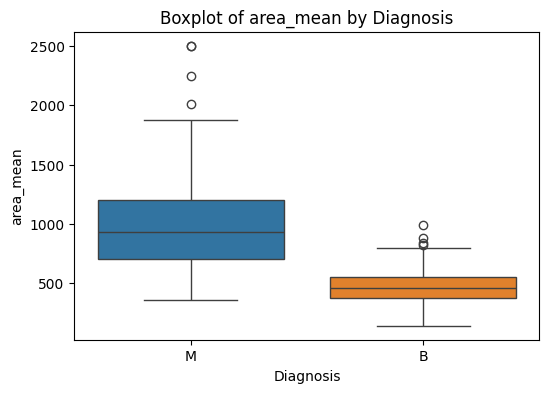

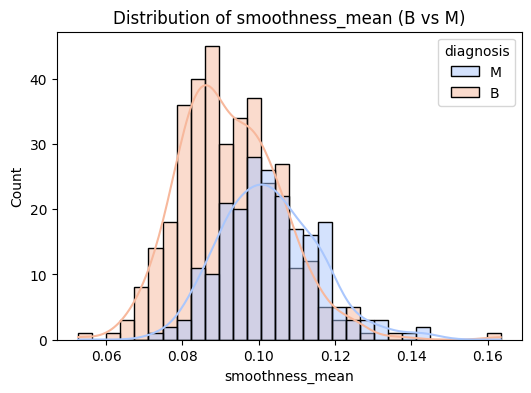

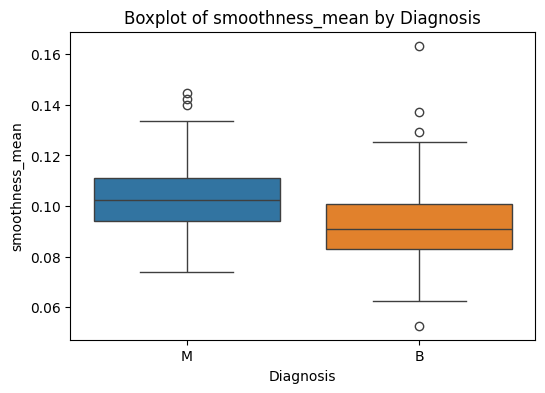

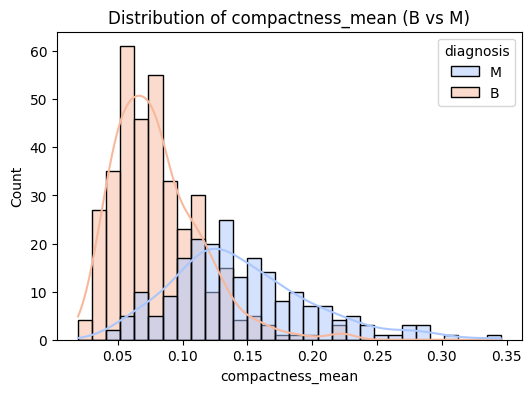

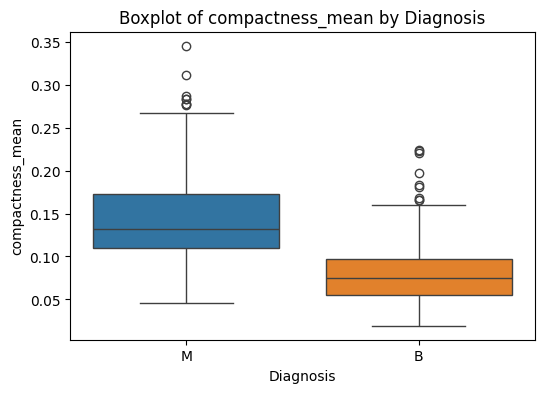

In [68]:
num_features = df.columns.drop("diagnosis")
for col in num_features[:6]:  #Plots a histogram and a boxplot for first 6 features. This shows the distribution of malignant and benign tumors for that particular feature. 
    #Plot histogram
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="diagnosis", bins=30, kde=True, palette="coolwarm")
    plt.title(f"Distribution of {col} (B vs M)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    #Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="diagnosis",  y=col,hue="diagnosis", )
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(col)
    plt.show()

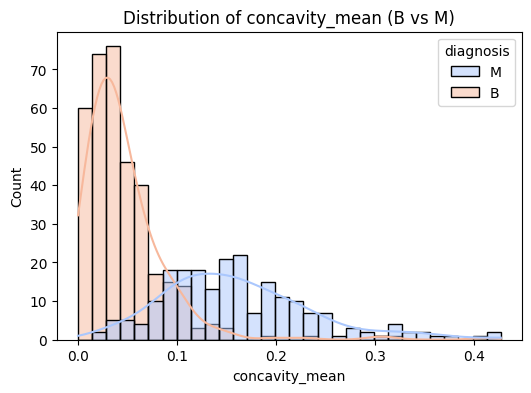

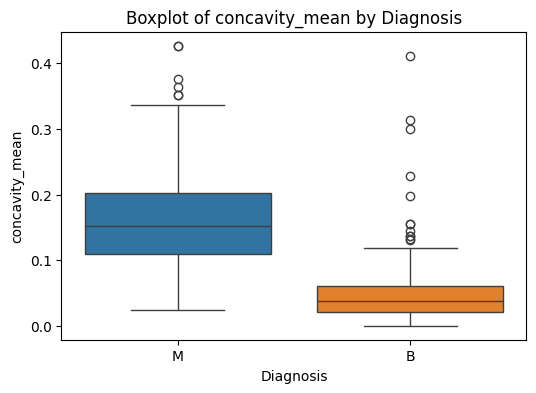

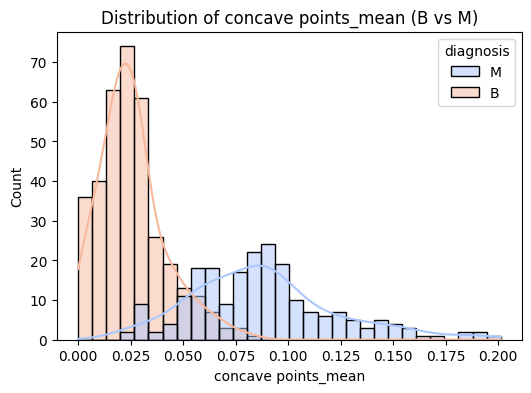

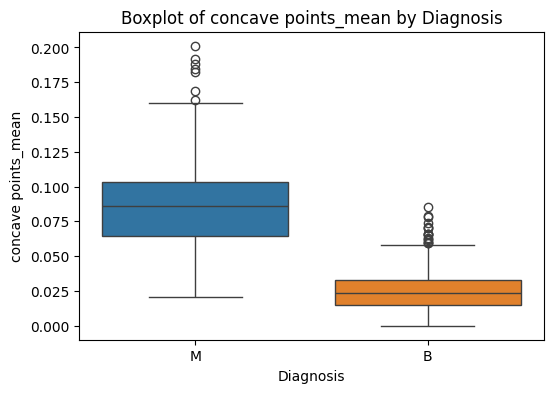

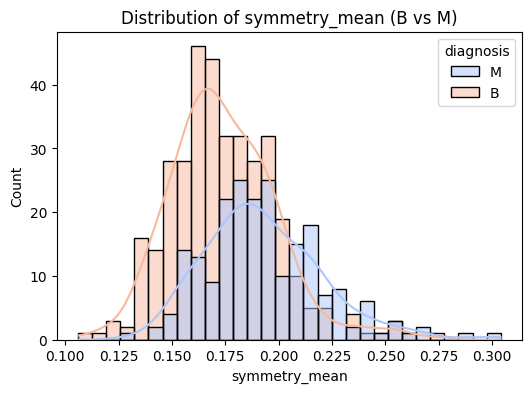

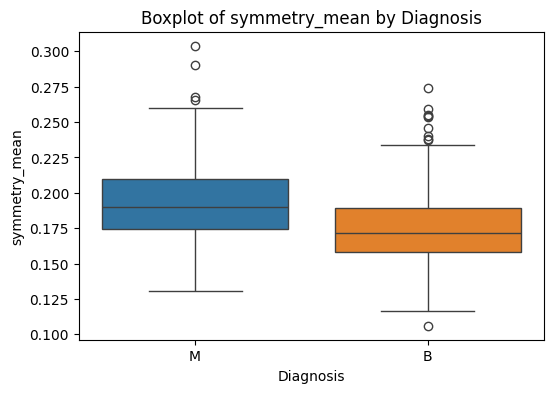

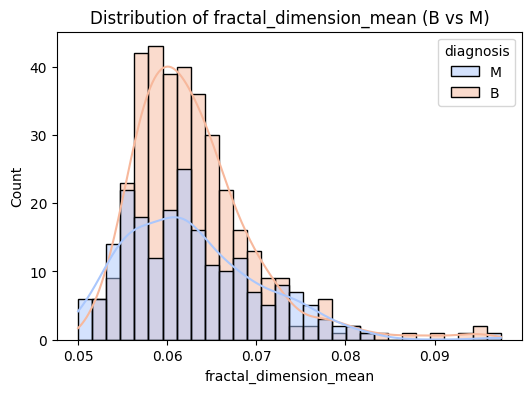

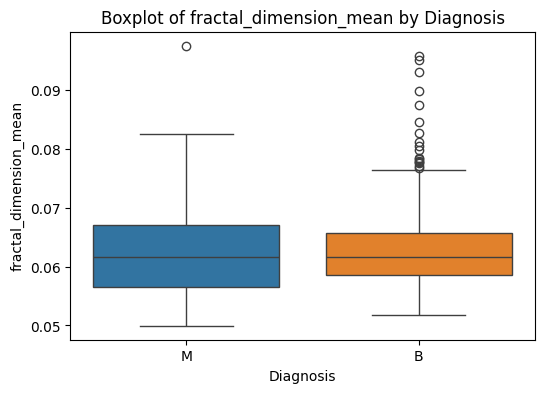

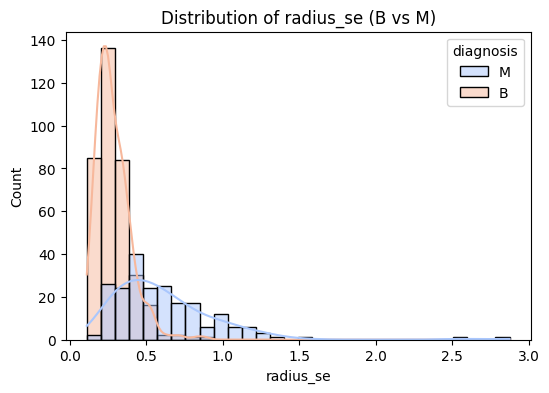

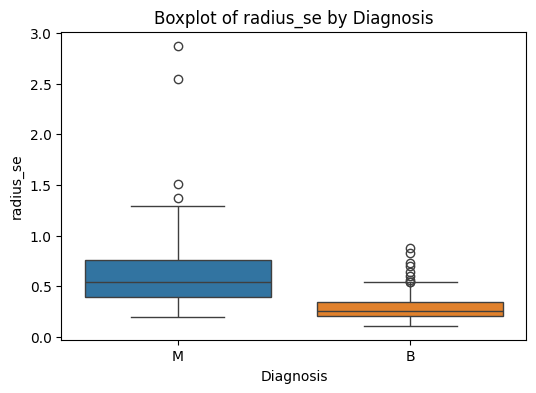

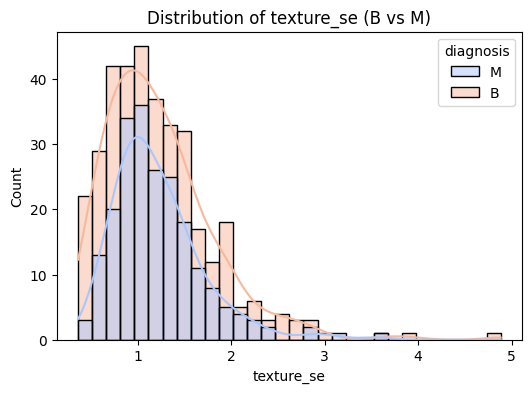

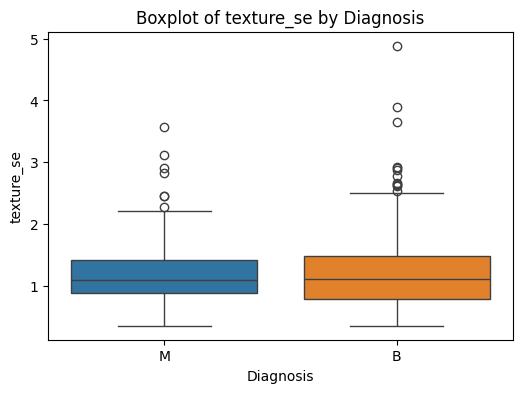

In [69]:
for col in num_features[6:12]:  #Plots a histogram and a boxplot for next 6 features.
    #Plot histogram
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="diagnosis", bins=30, kde=True, palette="coolwarm")
    plt.title(f"Distribution of {col} (B vs M)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    #Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="diagnosis",  y=col,hue="diagnosis", )
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(col)
    plt.show()

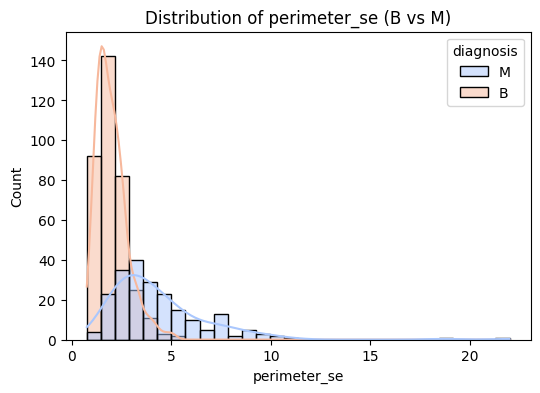

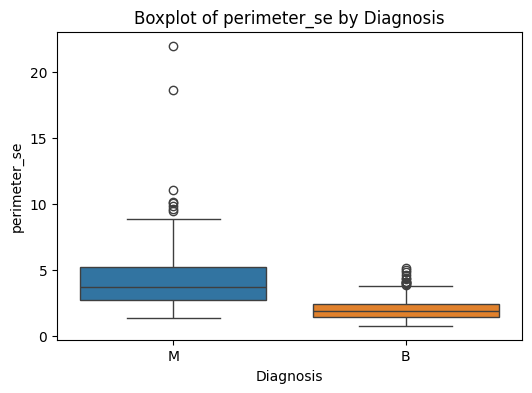

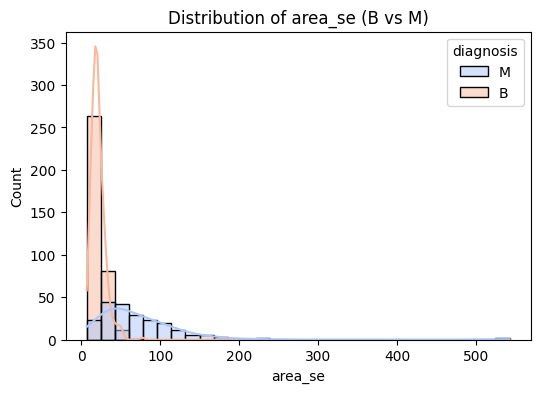

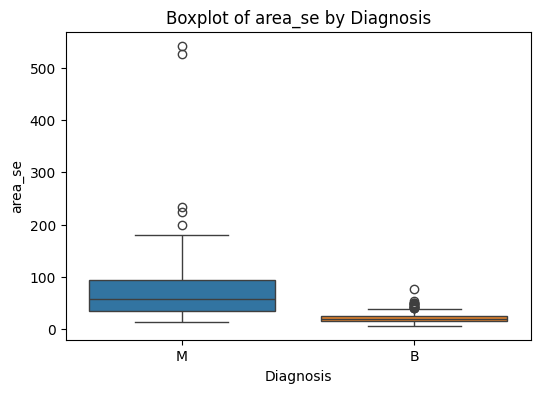

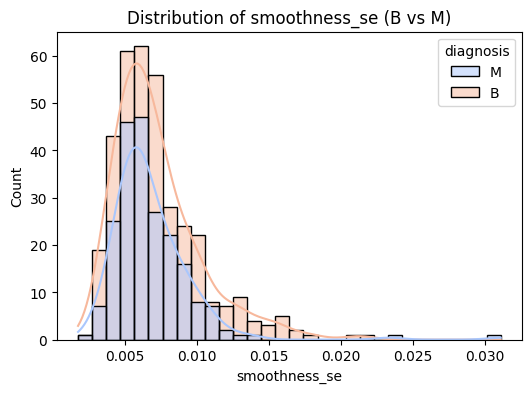

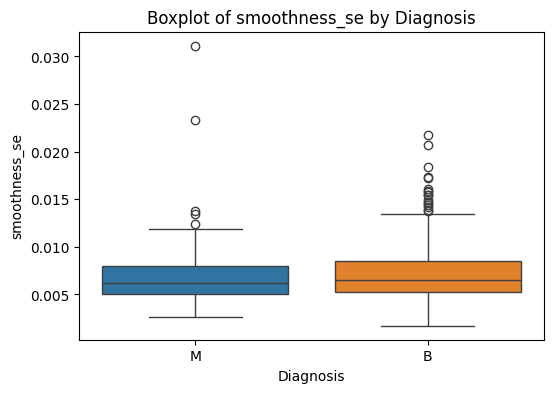

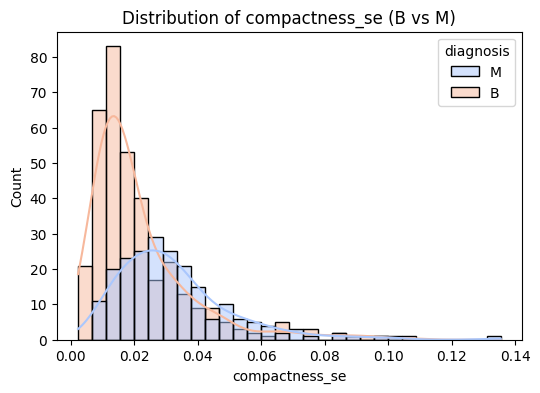

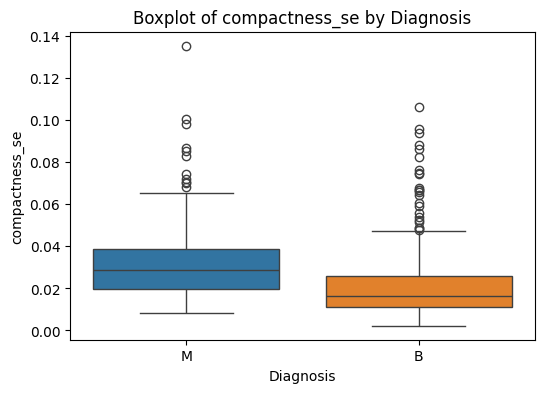

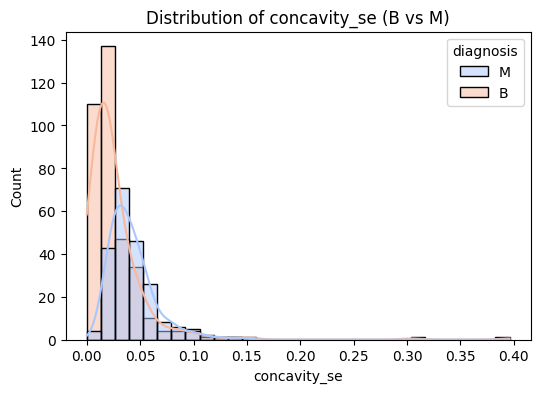

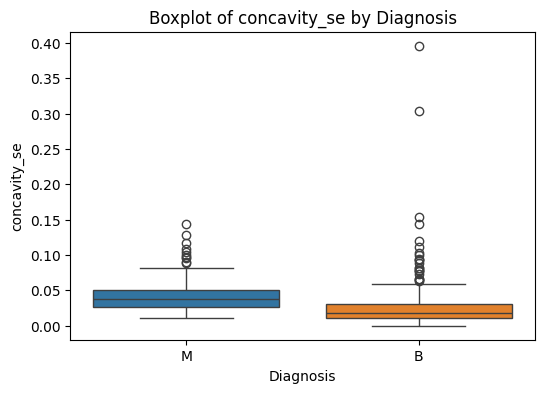

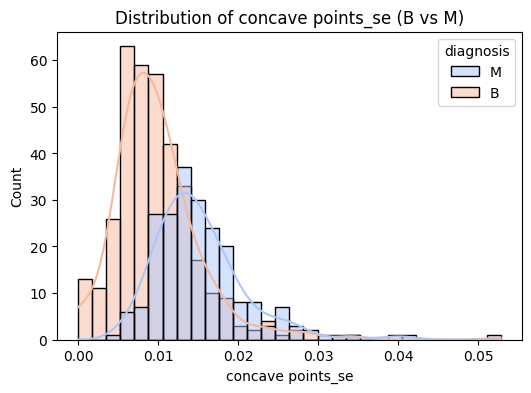

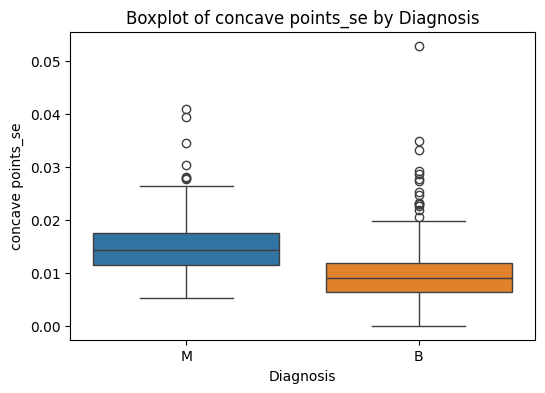

In [70]:
for col in num_features[12:18]:  #Plots a histogram and a boxplot for next 6 features.
    #Plot histogram
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="diagnosis", bins=30, kde=True, palette="coolwarm")
    plt.title(f"Distribution of {col} (B vs M)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    #Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="diagnosis",  y=col,hue="diagnosis", )
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(col)
    plt.show()

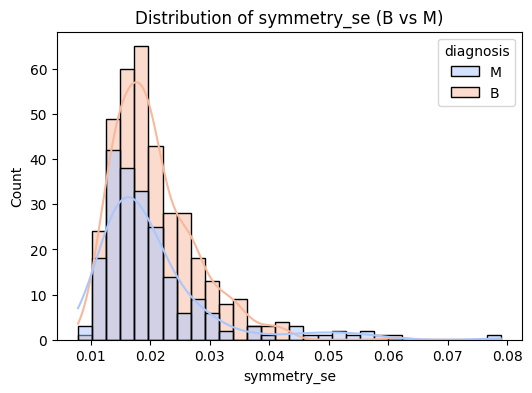

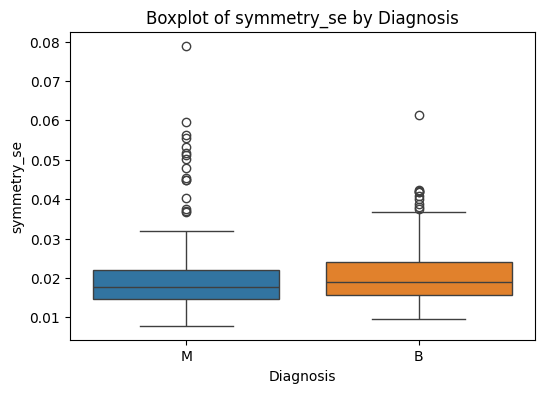

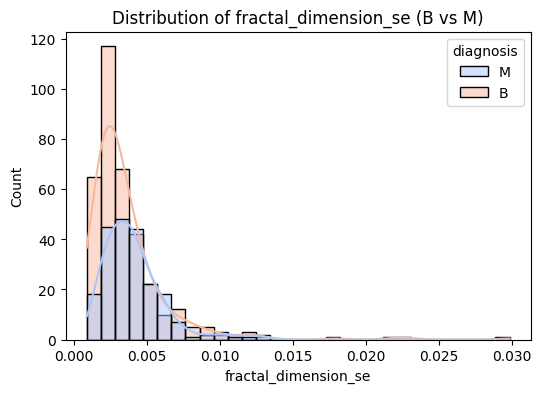

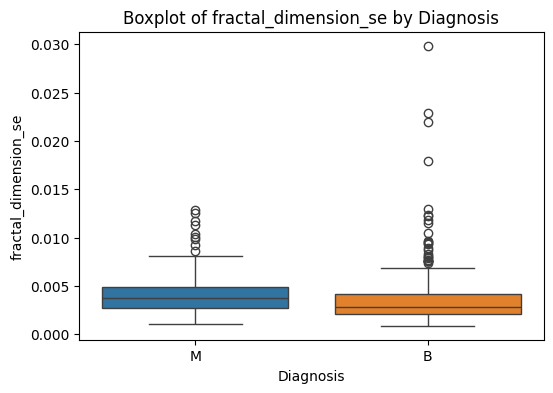

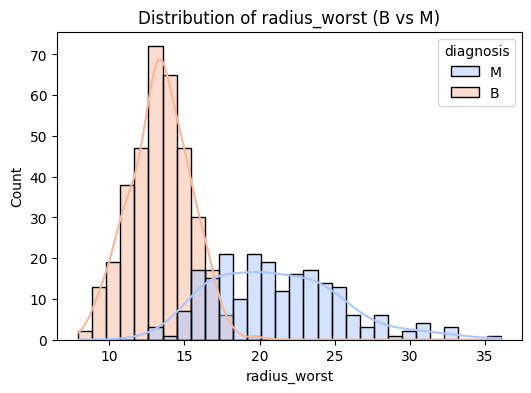

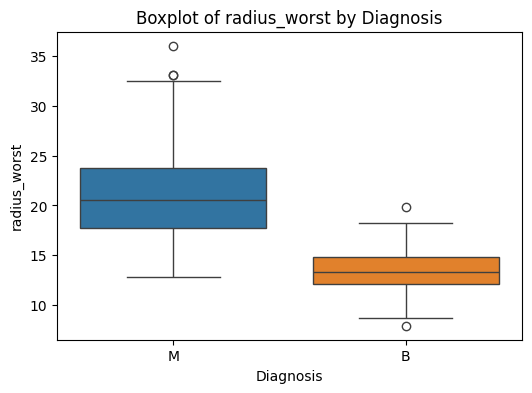

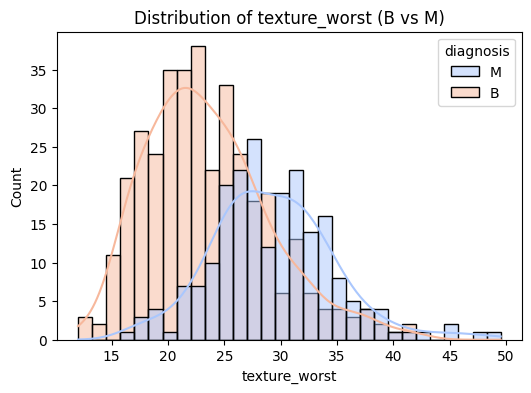

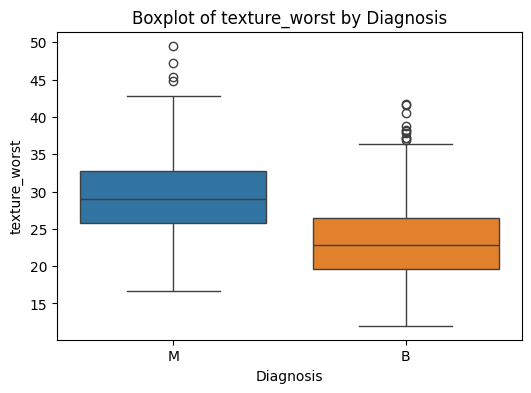

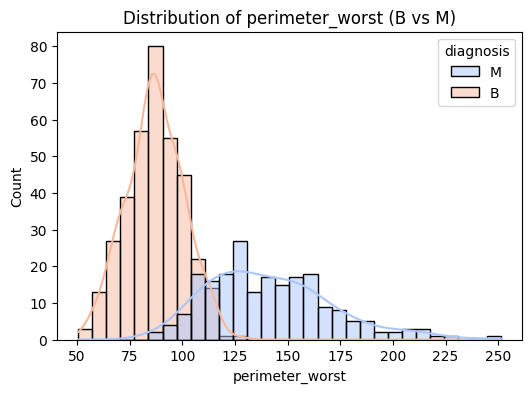

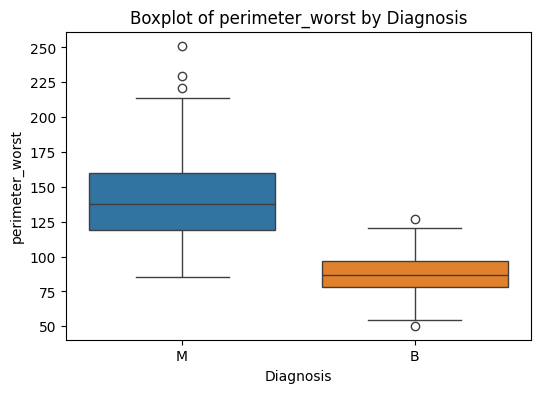

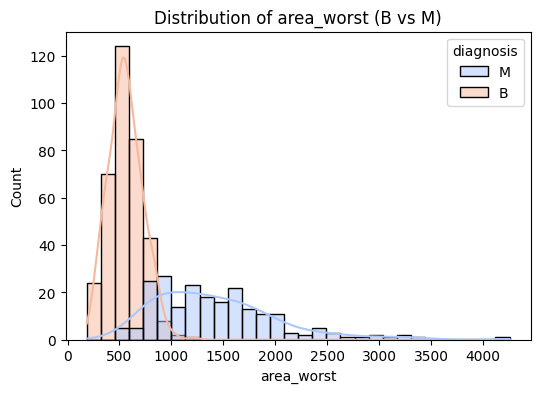

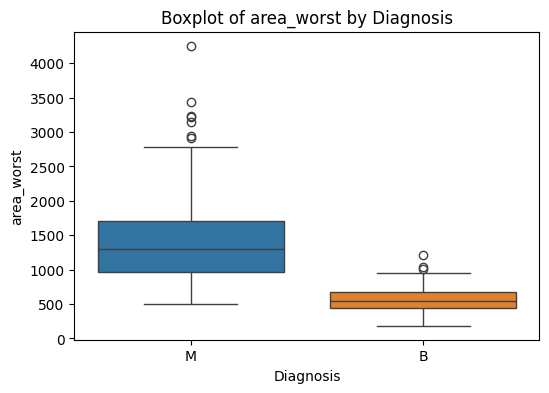

In [71]:
for col in num_features[18:24]:  #Plots a histogram and a boxplot for next 6 features.
    #Plot histogram
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="diagnosis", bins=30, kde=True, palette="coolwarm")
    plt.title(f"Distribution of {col} (B vs M)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    #Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="diagnosis",  y=col,hue="diagnosis", )
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(col)
    plt.show()

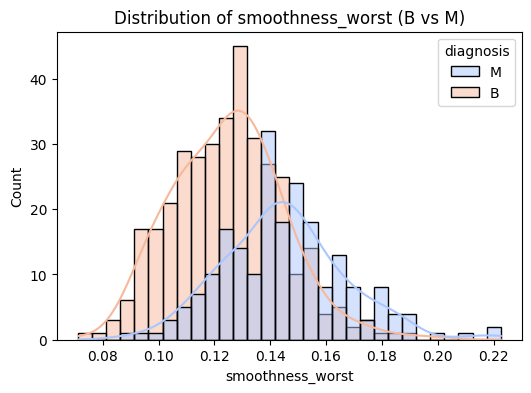

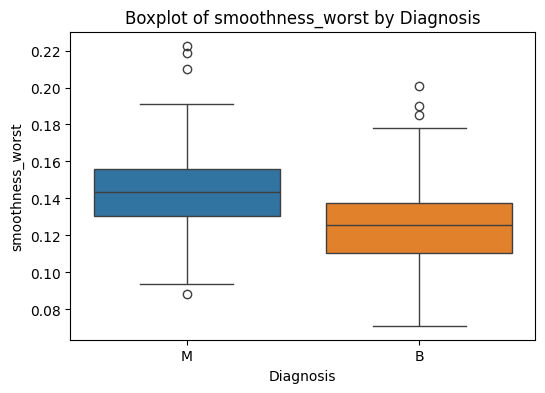

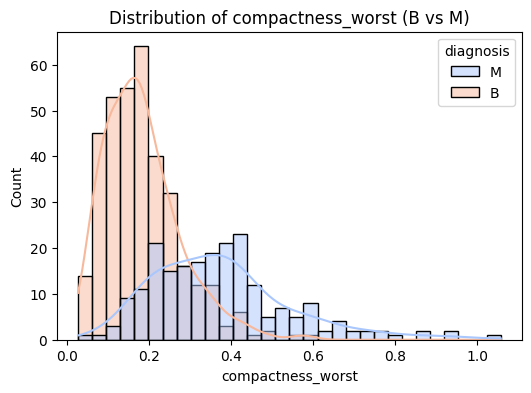

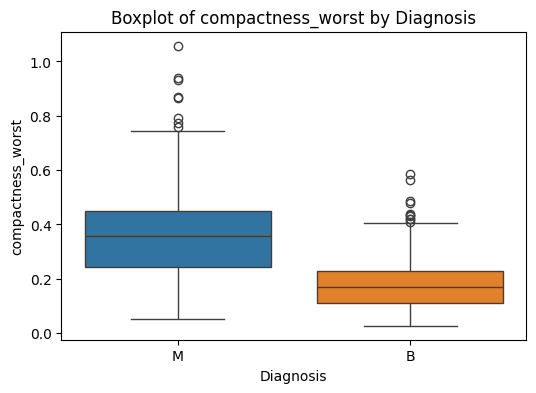

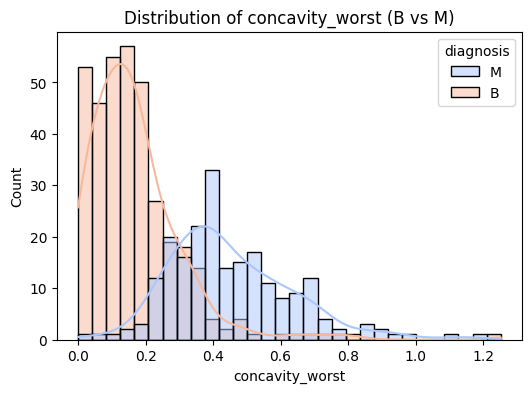

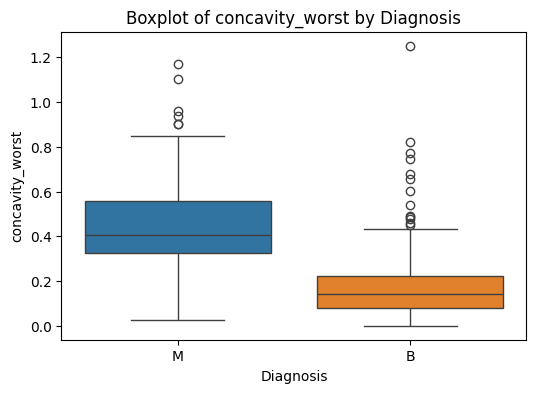

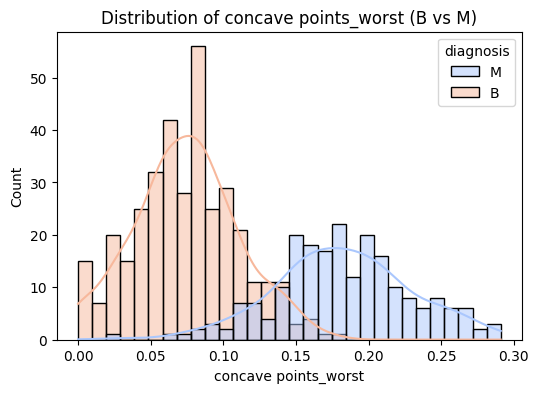

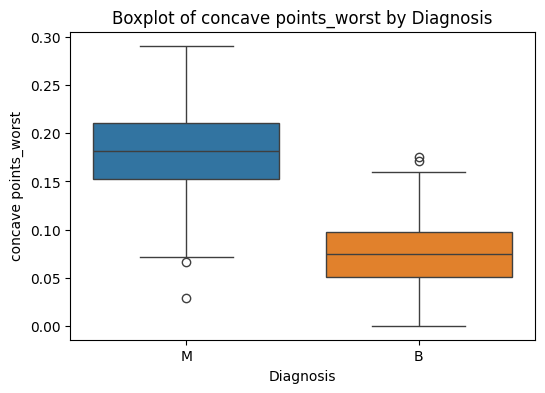

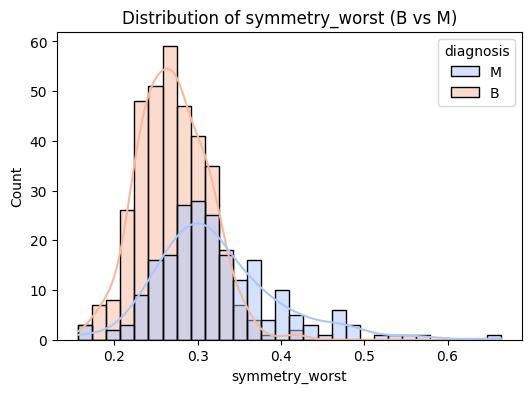

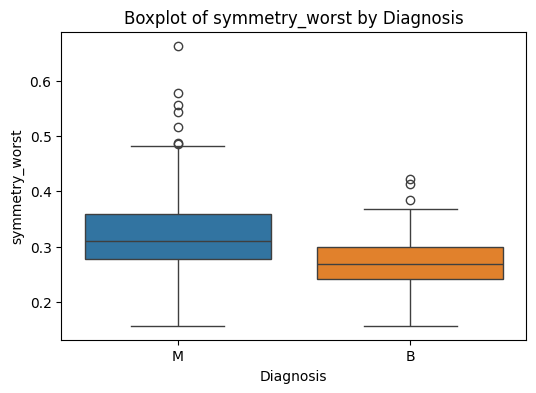

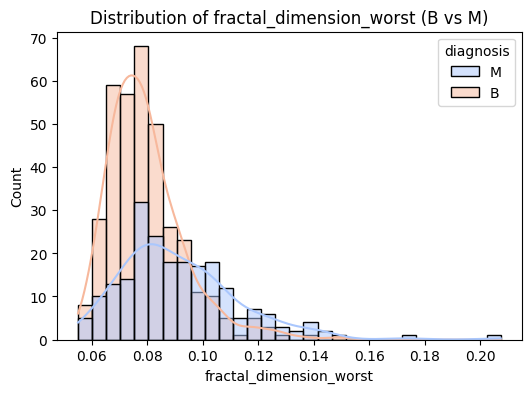

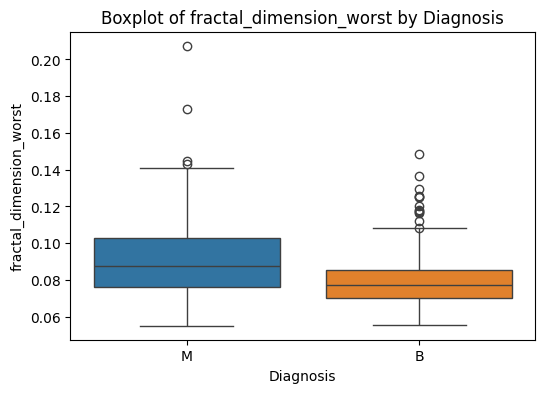

In [72]:
for col in num_features[24:30]:  #Plots a histogram and a boxplot for next 6 features.
    #Plot histogram
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="diagnosis", bins=30, kde=True, palette="coolwarm")
    plt.title(f"Distribution of {col} (B vs M)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    #Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="diagnosis",  y=col,hue="diagnosis", )
    plt.title(f"Boxplot of {col} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(col)
    plt.show()

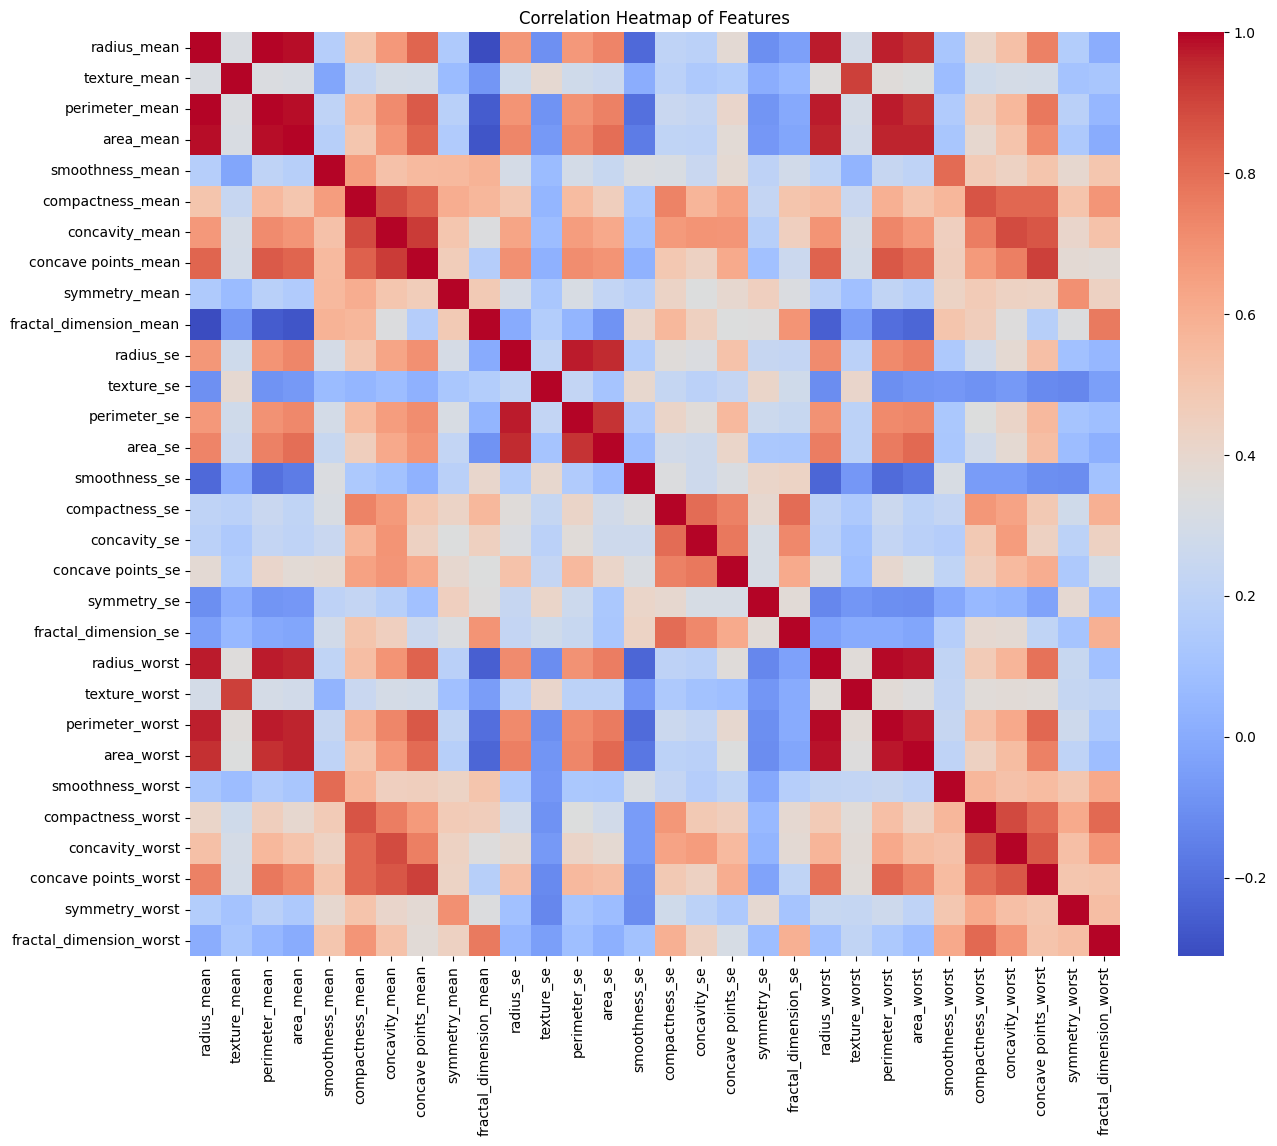

In [73]:
plt.figure(figsize=(15,12))
corr = df[num_features].corr()   #Plots a correlation heatmap for the numeric features
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

In [74]:
df['diagnosis_num'] = df['diagnosis'].map({'B':0, 'M':1})
# corelation of every  feature with diagnosis
corr_with_target = df[num_features].corrwith(df['diagnosis_num'])
print(corr_with_target.sort_values(ascending=False))

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

# Exploratory Data Analysis (EDA) – Summary

In this section, we explored the Breast Cancer dataset to understand its structure, identify important patterns, and highlight potential predictors of tumor diagnosis.

## 1. Distribution of Diagnosis
- The dataset contains two classes: **Benign (B)** and **Malignant (M)** tumors.  
- The class distribution was visualized using a countplot, which confirmed that both categories are present, although not perfectly balanced.

## 2. Feature Exploration
- Visualizations (boxplots/scatterplots) for key features such as `radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, `smoothness_mean`, and `concavity_mean` showed clear differences between benign and malignant tumors.  
- Malignant tumors generally tend to have:
  - Higher radius, perimeter, and area values.
  - Larger concavity and concave points.

## 3. Correlation Analysis
- A **correlation heatmap** revealed strong inter-feature correlations (e.g., `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated).  
- Correlation with the target variable (Diagnosis) showed the most predictive features are:
  - `concave points_worst` (0.79)  
  - `perimeter_worst` (0.78)  
  - `radius_worst` (0.77)  
  - `area_worst` (0.73)  
- Features like `fractal_dimension_mean` and `smoothness_se` showed very weak or negative correlation with diagnosis.

## 4. Insights
- Tumor **size-related features** (radius, area, perimeter) and **shape-related features** (concavity, concave points) are strongly linked to malignancy.  
- Texture and smoothness contribute moderately.  
- Some features are weakly associated and may not add much predictive value.

---

This EDA provides a strong foundation to move forward into **statistical testing** (to validate these differences quantitatively) and then **machine learning modeling** for prediction.


In [75]:
# Separate data into malignant and benign
malignant = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']

malignant.shape, benign.shape


((212, 32), (357, 32))

In [76]:
from scipy.stats import ttest_ind

# Example test on radius_mean
t_stat, p_val = ttest_ind(malignant['radius_mean'], benign['radius_mean'])

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 25.435821610057054
P-value: 8.465940572262422e-96


In [77]:
results = {}
for col in df.columns[2:]:   # skipping ID and diagnosis
    t_stat, p_val = ttest_ind(malignant[col], benign[col])
    results[col] = p_val

# Convert to DataFrame for better view
p_values_df = pd.DataFrame(results.items(), columns=['Feature', 'P-value']).sort_values(by='P-value')

p_values_df.head(10)  # top 10 smallest p-values

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Feature,P-value
29,diagnosis_num,0.000000e+00
26,concave points_worst,1.969100e-124
21,perimeter_worst,5.771397e-119
6,concave points_mean,7.101150e-116
19,radius_worst,8.482292e-116
1,perimeter_mean,8.436251e-101
22,area_worst,2.828848e-97
2,area_mean,4.734564e-88
5,concavity_mean,9.966556e-84
25,concavity_worst,2.464664e-72


## 5. Statistical Testing of Feature Significance

To complement our Exploratory Data Analysis (EDA), we performed statistical hypothesis testing to assess whether the differences in feature values between **benign (B)** and **malignant (M)** tumors are statistically significant.  

### 5.1 Independent Samples T-Test
We first conducted an independent samples t-test on the `radius_mean` feature between the two groups:  

- **T-statistic**: 25.43  
- **P-value**: 8.46e-96  

Since the p-value is extremely small (< 0.05), we conclude that the difference in `radius_mean` between benign and malignant tumors is highly statistically significant.  

### 5.2 Multiple Feature Testing
We extended the t-test to all 30 numerical features. Below are the top 10 most statistically significant features ranked by p-value:  

| Feature              | P-value        |
|----------------------|----------------|
| concave points_worst | 1.97e-124      |
| perimeter_worst      | 5.77e-119      |
| concave points_mean  | 7.10e-116      |
| radius_worst         | 8.48e-116      |
| area_worst           | 2.82e-97       |
| area_mean            | 4.73e-88       |
| concavity_mean       | 9.96e-84       |
| concavity_worst      | 2.46e-72       |
| perimeter_mean       | 8.43e-101      |
| diagnosis_num        | 0.00           |

### 5.3 Interpretation
- Almost all key geometric and shape-related features (radius, perimeter, area, concavity, concave points) show **extremely low p-values**, confirming that they are highly discriminative between benign and malignant tumors.  
- These results are consistent with our earlier **correlation analysis**, strengthening confidence in feature selection.  

### 5.4 Next Steps
While statistical significance (p-value) tells us whether differences exist, it does **not measure the magnitude of the effect**.  
For this, we calculate **effect size** (Cohen’s d), which quantifies *how strong* the difference between the two groups is for each feature.  


In [78]:
# Function to calculate Cohen's d
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    pooled_sd = np.sqrt(((len(group1) - 1) * sd1**2 + (len(group2) - 1) * sd2**2) / (len(group1) + len(group2) - 2))
    return (mean1 - mean2) / pooled_sd

# Top 5 features
top_features = ["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "area_worst"]

# Split data into groups
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

# Calculate Cohen's d for each top feature
effect_sizes = {}
for feature in top_features:
    d = cohens_d(malignant[feature], benign[feature])  # malignant - benign
    effect_sizes[feature] = d

effect_sizes

{'concave points_worst': np.float64(2.6926469041602608),
 'perimeter_worst': np.float64(2.598237065933424),
 'concave points_mean': np.float64(2.545224518128912),
 'radius_worst': np.float64(2.5439033612813833),
 'area_worst': np.float64(2.2302415902137653)}

### Statistical Testing and Effect Size Analysis

After identifying the most significant features using independent two-sample t-tests, we further quantified the magnitude of differences between malignant (M) and benign (B) groups using **Cohen’s d** effect size measure.

**Why Cohen’s d?**
- p-values indicate whether a difference exists, but not how large or meaningful that difference is.
- Cohen’s d measures the **standardized difference** between two groups, making it easier to interpret the practical significance of the results.

**Interpretation guideline:**
- 0.2 → Small effect  
- 0.5 → Medium effect  
- 0.8+ → Large effect  

**Results (Top 5 Features):**

| Feature               | Cohen’s d | Interpretation |
|------------------------|-----------|----------------|
| concave points_worst   | 2.69      | Very large     |
| perimeter_worst        | 2.60      | Very large     |
| concave points_mean    | 2.55      | Very large     |
| radius_worst           | 2.54      | Very large     |
| area_worst             | 2.23      | Very large     |

**Conclusion:**  
The effect sizes for all top five features are greater than 2, which is far beyond the threshold for a “large” effect. This indicates that malignant and benign tumors differ drastically in these morphological characteristics. These features will serve as powerful predictors in the subsequent machine learning models.


C:\Users\User\AppData\Local\Temp\ipykernel_2200\1978221070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_2200\1978221070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_2200\1978221070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=df, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_2200\1978221070.py

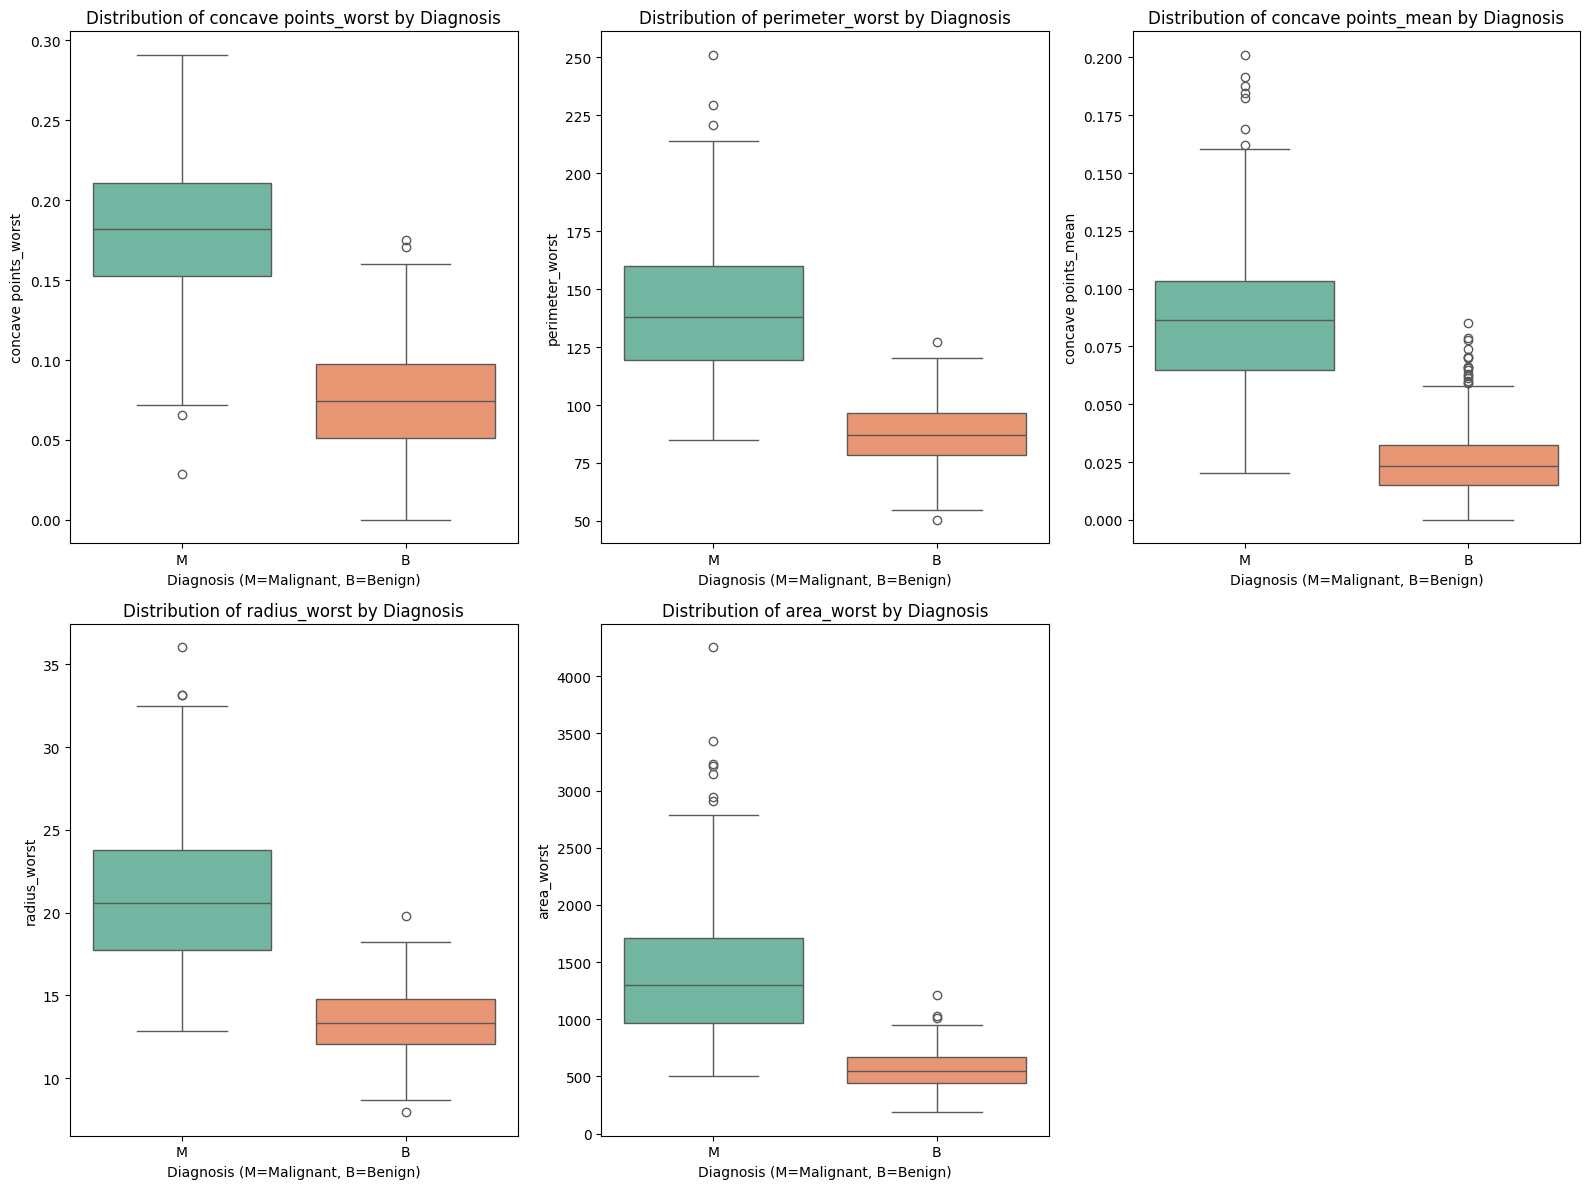

In [79]:
# Top 5 features
top5_features = ["concave points_worst", "perimeter_worst", 
                 "concave points_mean", "radius_worst", "area_worst"]

plt.figure(figsize=(16, 12))

for i, feature in enumerate(top5_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="diagnosis", y=feature, data=df, palette="Set2")
    plt.title(f"Distribution of {feature} by Diagnosis", fontsize=12)
    plt.xlabel("Diagnosis (M=Malignant, B=Benign)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2200\1374706651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="diagnosis", y=feature, data=df, palette="Pastel1", inner="quartile")
C:\Users\User\AppData\Local\Temp\ipykernel_2200\1374706651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="diagnosis", y=feature, data=df, palette="Pastel1", inner="quartile")
C:\Users\User\AppData\Local\Temp\ipykernel_2200\1374706651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="diagnosis", y=feature, data=df, palette="Pastel1", inner="

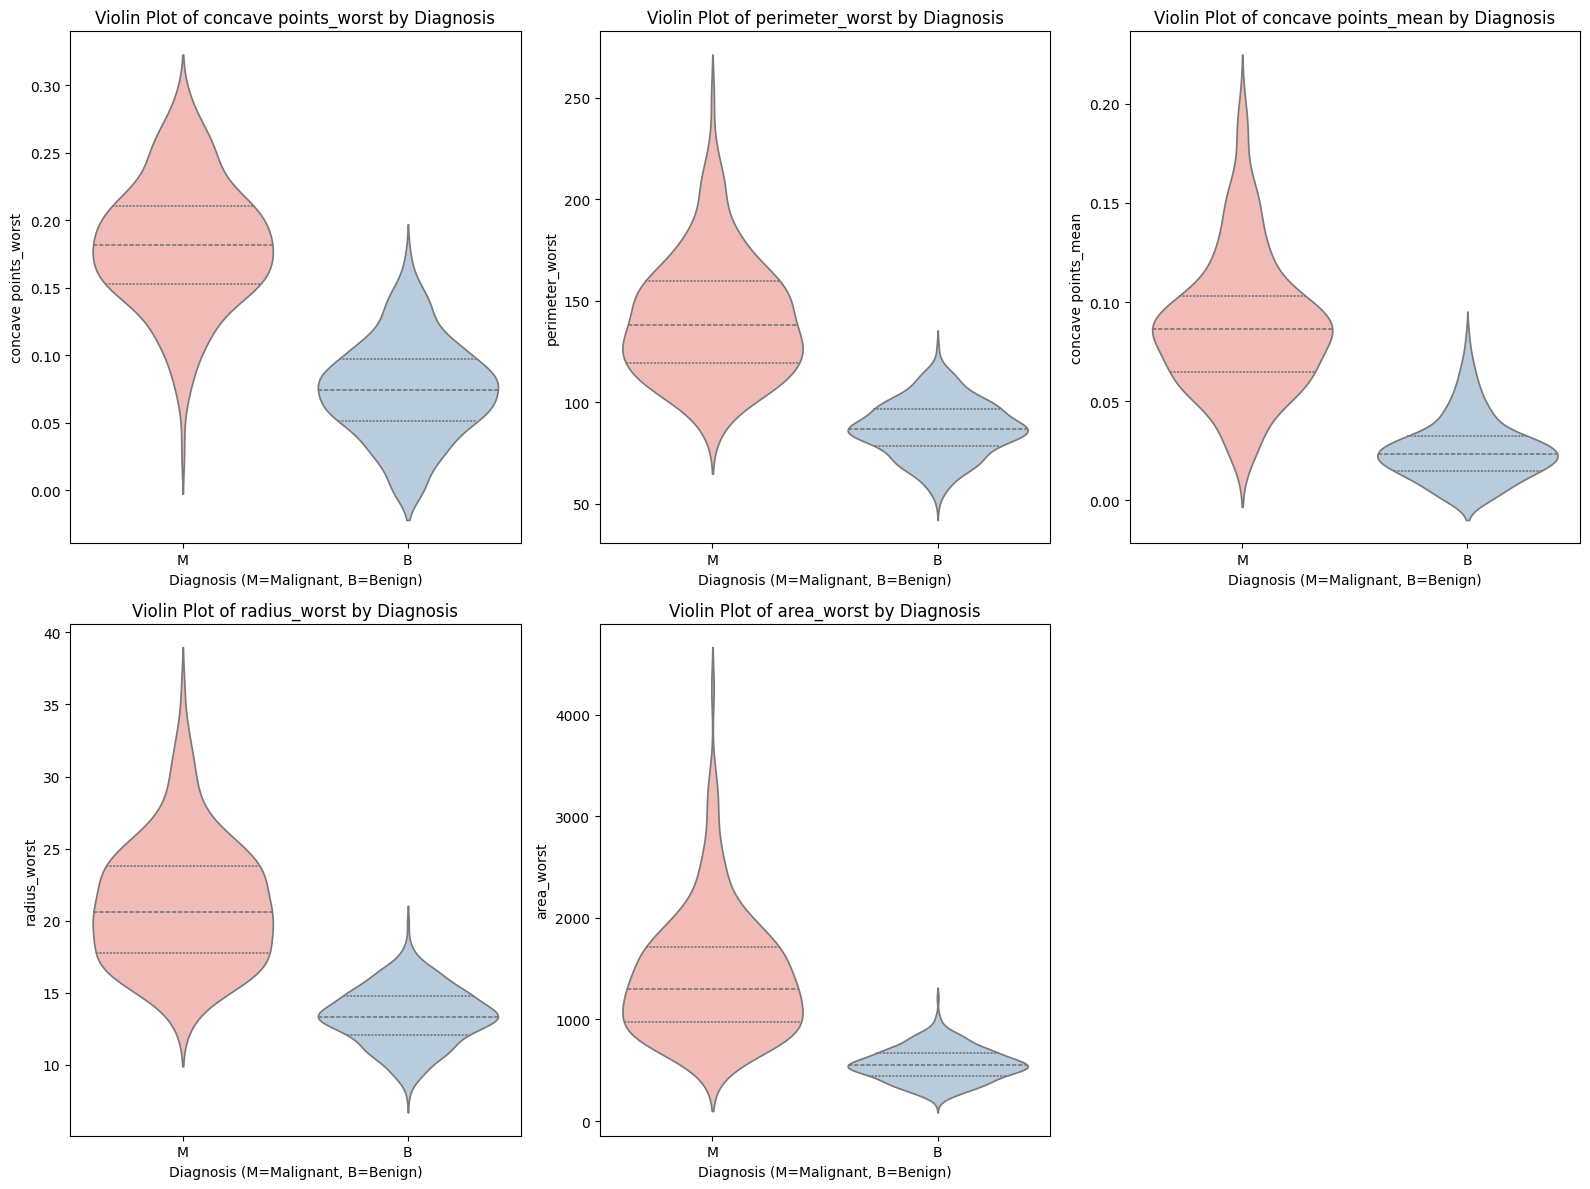

In [80]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(top5_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x="diagnosis", y=feature, data=df, palette="Pastel1", inner="quartile")
    plt.title(f"Violin Plot of {feature} by Diagnosis", fontsize=12)
    plt.xlabel("Diagnosis (M=Malignant, B=Benign)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

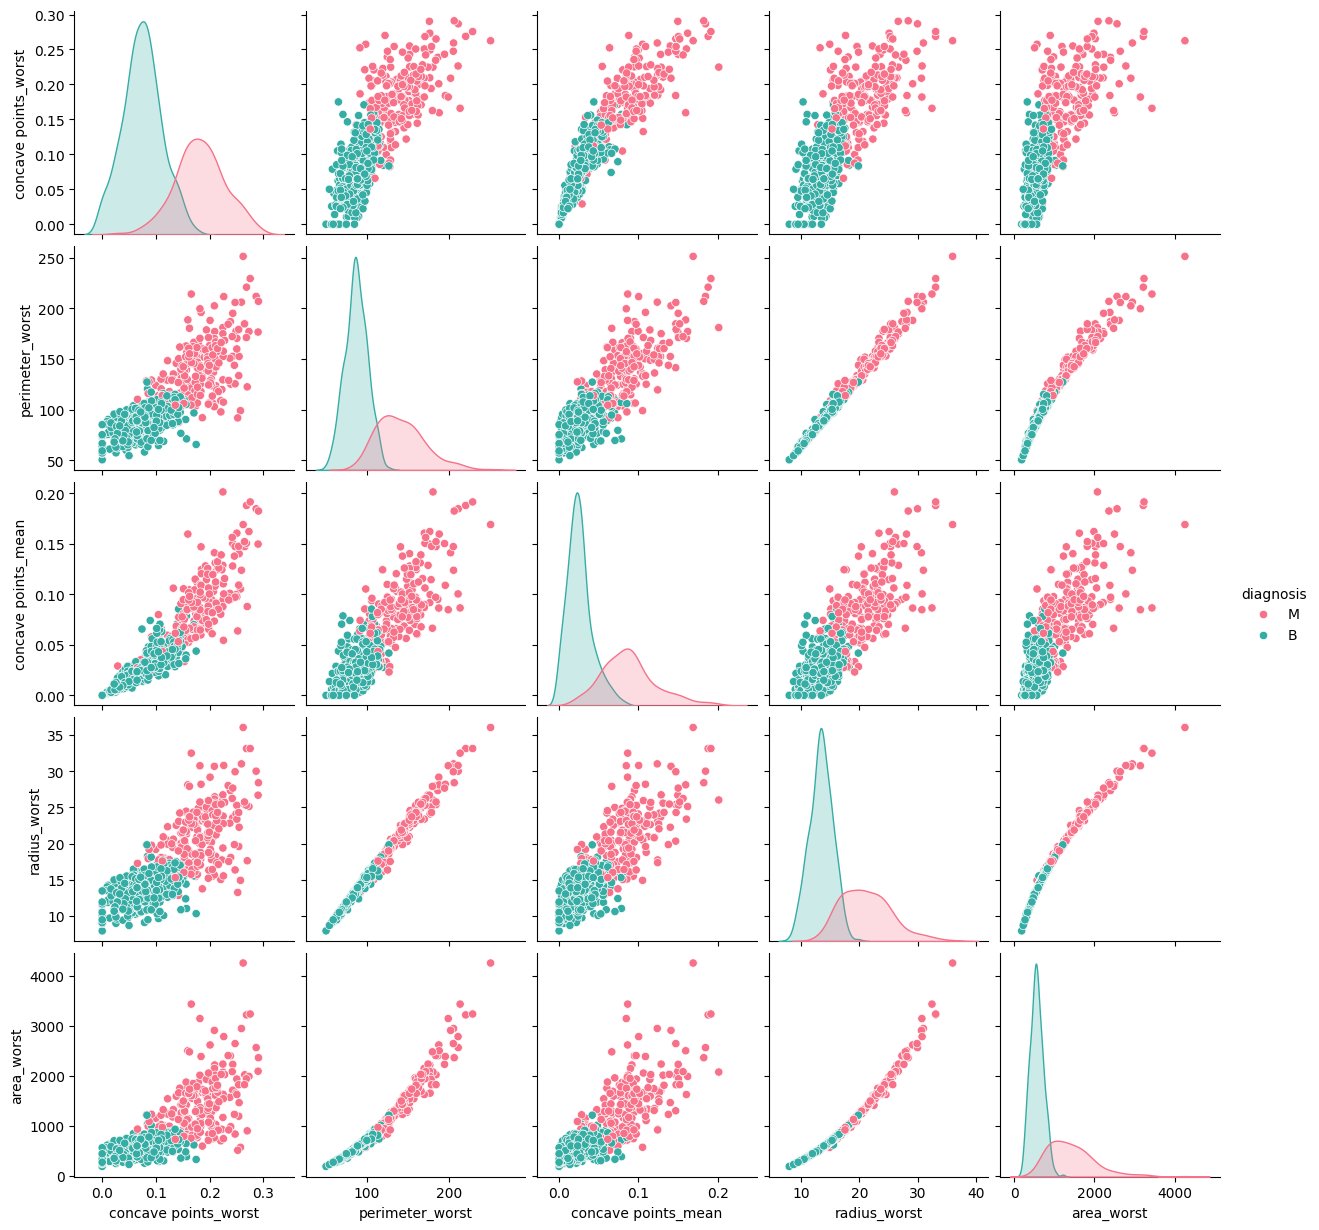

In [81]:
sns.pairplot(df[top5_features + ["diagnosis"]], hue="diagnosis", diag_kind="kde", palette="husl")
plt.show()

In [82]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode target
df['diagnosis_num'] = df['diagnosis'].map({'B':0, 'M':1})

# Features (only numeric, drop target & any non-numeric)
X = df.select_dtypes(include='number').drop(['diagnosis_num'], axis=1)
y = df['diagnosis_num']

# Train-Test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes & NaNs
import numpy as np
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Training data NaNs:", np.isnan(X_train_scaled).sum())
print("Test data NaNs:", np.isnan(X_test_scaled).sum())

Train shape: (455, 30)
Test shape: (114, 30)
Training data NaNs: 0
Test data NaNs: 0


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[71  1]
 [ 3 39]]


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


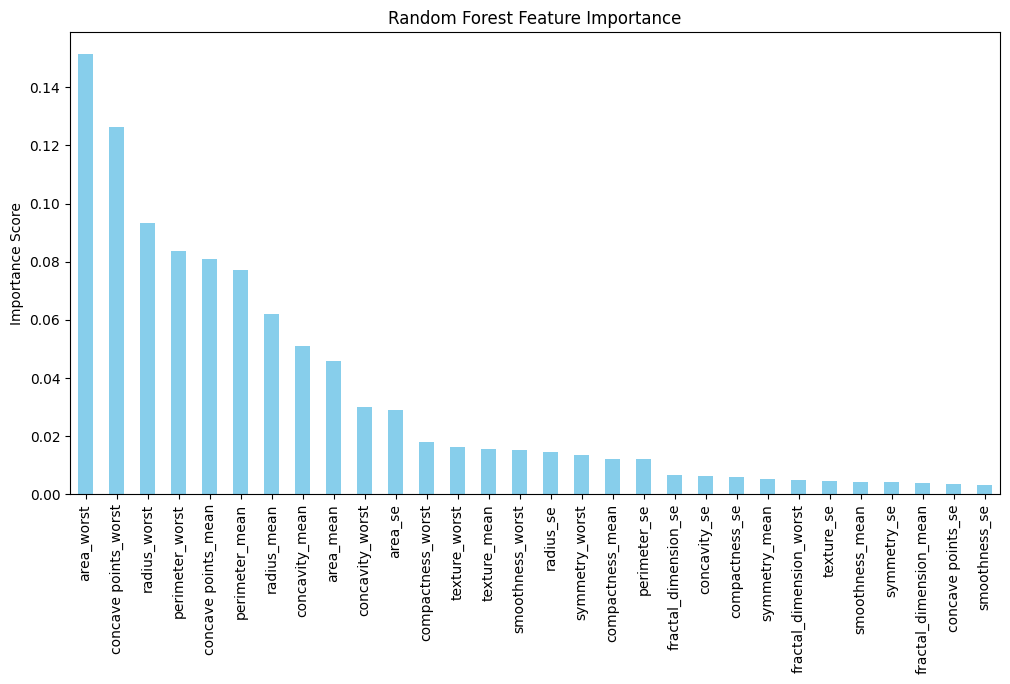

In [85]:
# Feature importance
feat_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
feat_importance.plot(kind='bar', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [86]:
from sklearn.svm import SVC

# Initialize SVM
svm_clf = SVC(kernel='rbf', random_state=42, probability=True)

# Train
svm_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [87]:
# Create dataframe
ml_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [0.9649, 0.9737, 0.9737],
    "Benign Recall": [0.99, 1.00, 1.00],
    "Malignant Recall": [0.93, 0.93, 0.93]
})

ml_comparison

,Model,Accuracy,Benign Recall,Malignant Recall
0,Logistic Regression,0.9649,0.99,0.93
1,Random Forest,0.9737,1.00,0.93
2,SVM,0.9737,1.00,0.93


# Breast Cancer Diagnosis Analysis: Final Summary

## 1. Objective
Predict whether a tumor is **Benign (B)** or **Malignant (M)** using patient tumor features from the Wisconsin Breast Cancer dataset.

---

## 2. Data Analysis & EDA
- Dataset shape: 569 samples, 30 numeric features
- No missing values after cleaning
- Key observations from EDA:
  - Malignant tumors tend to have **higher radius, perimeter, area, concavity**
  - Benign tumors show lower values for these features
- Correlation analysis:
  - `concave points_worst`, `perimeter_worst`, `radius_worst` highly correlated with diagnosis
- Statistical testing:
  - **T-test** and **Cohen's d** confirmed effect sizes for top features

---

## 3. Machine Learning
- **Train-Test Split:** 80-20  
- **Models Implemented:**
  1. Logistic Regression
  2. Random Forest Classifier
  3. Support Vector Machine (SVM)

| Model | Accuracy | Benign Recall | Malignant Recall |
|-------|----------|---------------|----------------|
| Logistic Regression | 0.9649 | 0.99 | 0.93 |
| Random Forest       | 0.9737 | 1.00 | 0.93 |
| SVM                 | 0.9737 | 1.00 | 0.93 |

- **Feature Importance (Random Forest):**
  - Top features: `area_worst`, `concave points_worst`, `radius_worst`, `perimeter_worst`, `concave points_mean`, `perimeter_mean`, `radius_mean`

---

## 4. Conclusion
- Tumor diagnosis can be **accurately predicted** using numeric tumor features
- Random Forest & SVM achieved **highest accuracy (~97.4%)**
- Feature importance analysis confirms **size & shape features** are most influential
- Both **data analysis (EDA, statistical testing)** and **machine learning** were integrated, providing a strong project showcase for placement/interview purposes.
